<a href="https://colab.research.google.com/github/srj101/future_prediction_facebook_prophet/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [ ]:
df_test=pd.read_csv("/content/drive/MyDrive/Machine Learning/Future/DailyDelhiClimateTest.csv")
df_train=pd.read_csv("/content/drive/MyDrive/Machine Learning/Future/DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
df_test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [ ]:

df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly.
df_train['y'] = np.log(df_train['y'])

In [ ]:
model = Prophet() #instantiate Prophet
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaooa2y22/rctiauwa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaooa2y22/xg7g0ysi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38821', 'data', 'file=/tmp/tmpaooa2y22/rctiauwa.json', 'init=/tmp/tmpaooa2y22/xg7g0ysi.json', 'output', 'file=/tmp/tmpaooa2y22/prophet_modelwb4xyc8x/prophet_model-20230716100121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:01:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:01:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''


future_data = model.make_future_dataframe(periods=113, freq = 'D')

forecast_data = model.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1570,2017-04-20,3.553332,3.421786,3.677644
1571,2017-04-21,3.557127,3.439620,3.675344
1572,2017-04-22,3.557428,3.433281,3.682726
1573,2017-04-23,3.556817,3.422472,3.691030
1574,2017-04-24,3.574090,3.445212,3.702351


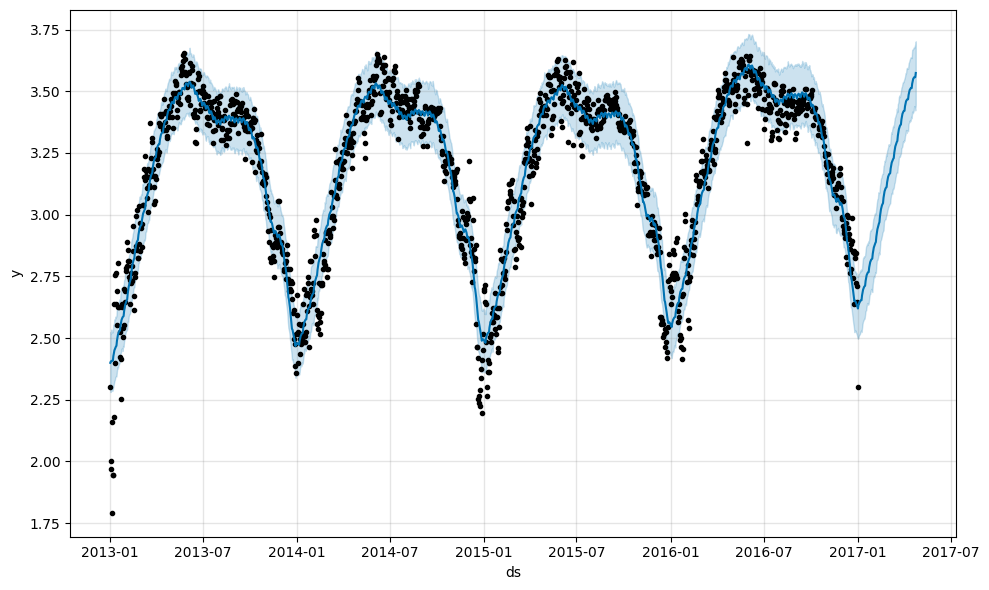

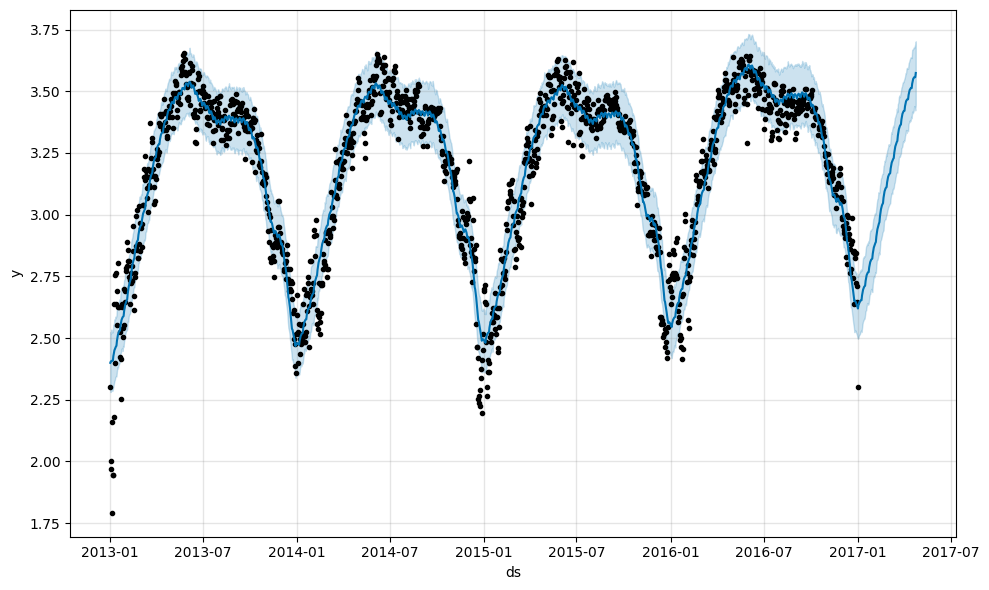

In [ ]:
model.plot(forecast_data)

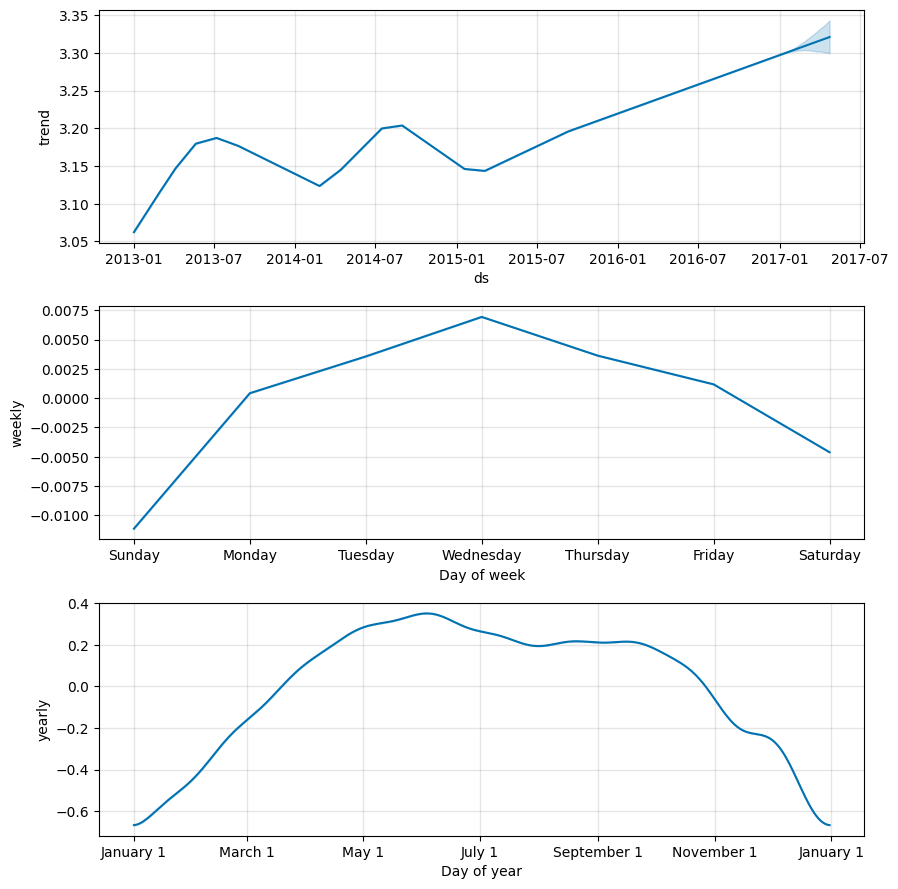

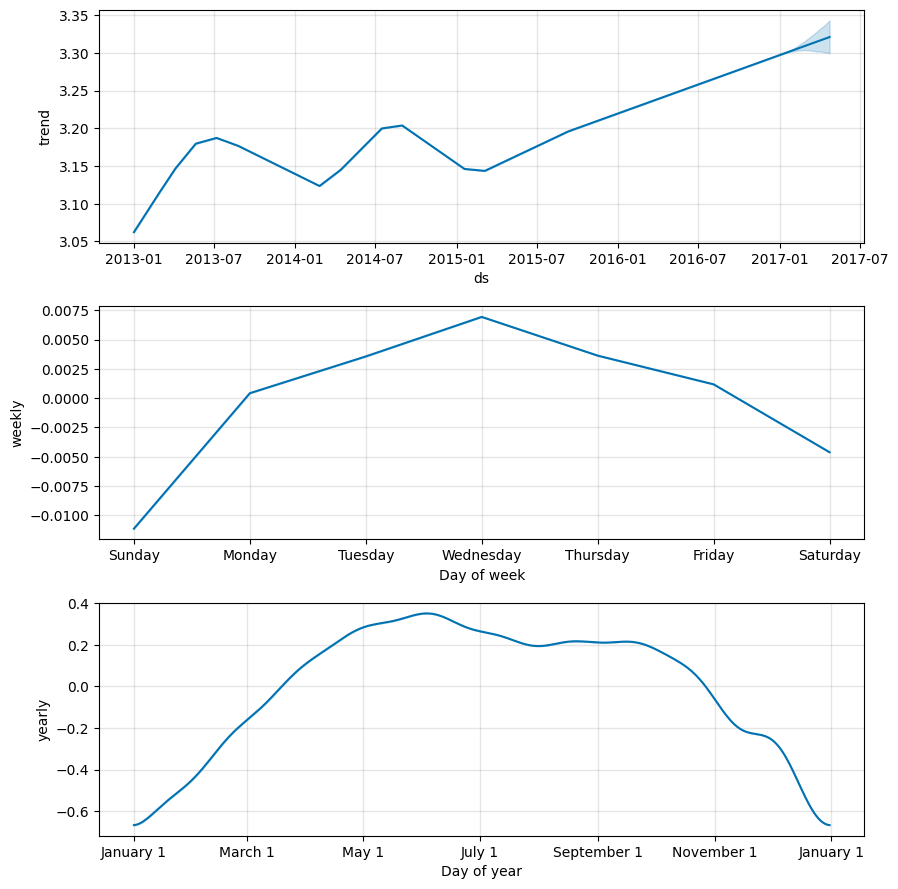

In [ ]:
model.plot_components(forecast_data)

In [ ]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

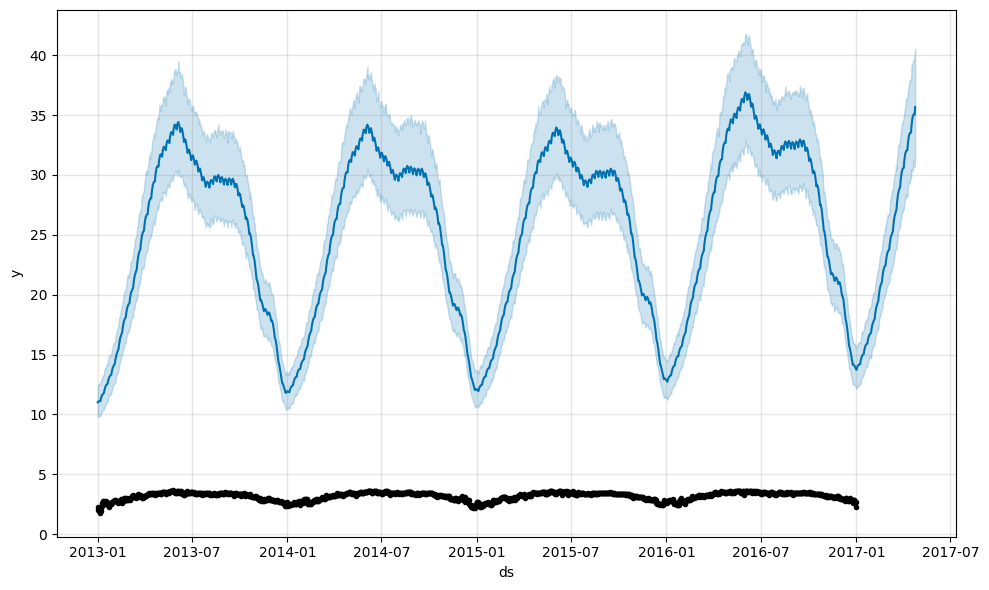

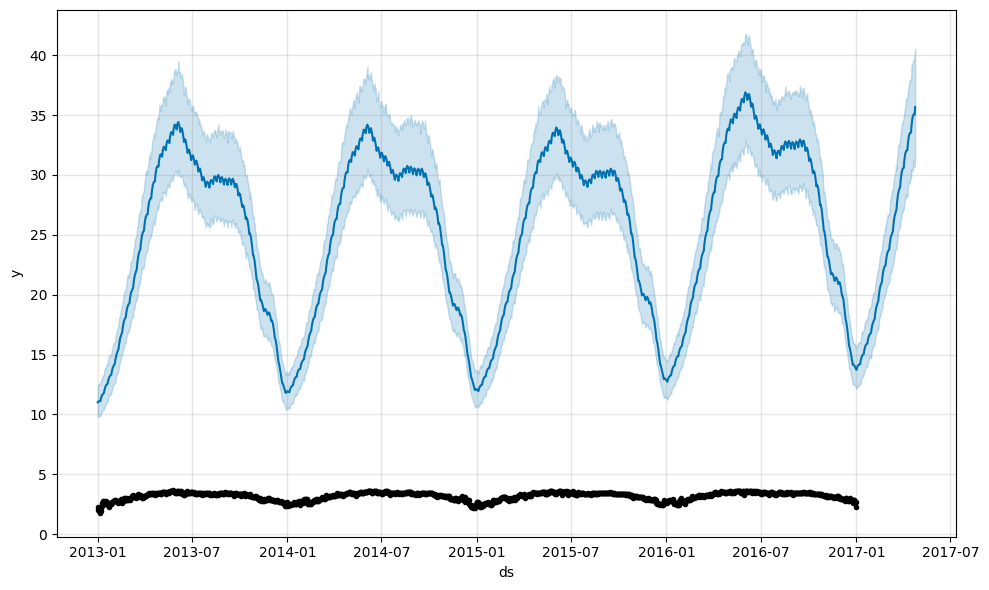

In [ ]:
model.plot(forecast_data_orig)


In [ ]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [ ]:

final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [ ]:
df_test.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
final_df.tail(113)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1462,2017-01-02,3.297240,12.205100,15.781786,3.297240,3.297240,-0.664501,-0.664501,-0.664501,0.000427,0.000427,0.000427,-0.664928,-0.664928,-0.664928,0.0,0.0,0.0,13.911823
1463,2017-01-03,3.297451,12.317134,15.808501,3.297451,3.297451,-0.658632,-0.658632,-0.658632,0.003566,0.003566,0.003566,-0.662198,-0.662198,-0.662198,0.0,0.0,0.0,13.996662
1464,2017-01-04,3.297663,12.345747,15.866730,3.297663,3.297663,-0.651395,-0.651395,-0.651395,0.006942,0.006942,0.006942,-0.658337,-0.658337,-0.658337,0.0,0.0,0.0,14.101311
1465,2017-01-05,3.297875,12.390431,16.003457,3.297875,3.297875,-0.649835,-0.649835,-0.649835,0.003636,0.003636,0.003636,-0.653471,-0.653471,-0.653471,0.0,0.0,0.0,14.126323
1466,2017-01-06,3.298086,12.498339,15.941017,3.298086,3.298086,-0.646548,-0.646548,-0.646548,0.001184,0.001184,0.001184,-0.647732,-0.647732,-0.647732,0.0,0.0,0.0,14.175830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2017-04-20,3.320096,30.624075,39.553112,3.300142,3.340719,0.233236,0.233236,0.233236,0.003636,0.003636,0.003636,0.229600,0.229600,0.229600,0.0,0.0,0.0,34.929524
1571,2017-04-21,3.320308,31.175100,39.462210,3.300035,3.341355,0.236819,0.236819,0.236819,0.001184,0.001184,0.001184,0.235635,0.235635,0.235635,0.0,0.0,0.0,35.062306
1572,2017-04-22,3.320519,30.978127,39.754630,3.299958,3.341892,0.236908,0.236908,0.236908,-0.004614,-0.004614,-0.004614,0.241522,0.241522,0.241522,0.0,0.0,0.0,35.072856
1573,2017-04-23,3.320731,30.645077,40.086112,3.299776,3.342461,0.236086,0.236086,0.236086,-0.011141,-0.011141,-0.011141,0.247227,0.247227,0.247227,0.0,0.0,0.0,35.051465


In [ ]:
rows = final_df["yhat"].tail(113)
rows = rows.reset_index()
rows.pop('index')

0      1462
1      1463
2      1464
3      1465
4      1466
       ... 
108    1570
109    1571
110    1572
111    1573
112    1574
Name: index, Length: 113, dtype: int64

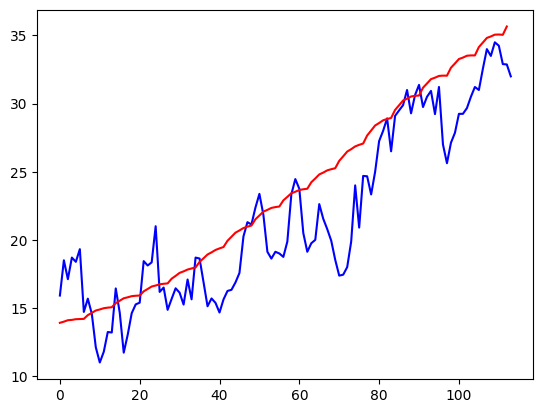

In [ ]:
# plot

import matplotlib.pyplot as plt
plt.plot(df_test['meantemp'], color = 'blue')
plt.plot(rows, color='red')
plt.show()

In [ ]:

df_test=pd.read_csv("/content/drive/MyDrive/Machine Learning/Future/DailyDelhiClimateTest.csv")
df_train=pd.read_csv("/content/drive/MyDrive/Machine Learning/Future/DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly.
df_train['y'] = np.log(df_train['y'])

model_new = Prophet() #instantiate Prophet
model_new.add_regressor('humidity')
model_new.add_regressor('wind_speed')
model_new.add_regressor('meanpressure')

In [ ]:
model_new.fit(df_train)

''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model_new.make_future_dataframe(periods=113, freq = 'D')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaooa2y22/61l604sa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaooa2y22/hfx_pm3h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33504', 'data', 'file=/tmp/tmpaooa2y22/61l604sa.json', 'init=/tmp/tmpaooa2y22/hfx_pm3h.json', 'output', 'file=/tmp/tmpaooa2y22/prophet_modelrflg9l02/prophet_model-20230716100501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:05:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_data.head(5)

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [ ]:
df=df.append(df_test)
df = df.rename(columns={'meantemp': 'y', 'date':'ds'})
future_data=df[['ds', 'humidity', 'wind_speed', 'meanpressure']]

<ipython-input-35-b7ed24a60f31>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
future_data.head(5)

,ds,humidity,wind_speed,meanpressure
0,2013-01-01,84.500000,0.000000,1015.666667
1,2013-01-02,92.000000,2.980000,1017.800000
2,2013-01-03,87.000000,4.633333,1018.666667
3,2013-01-04,71.333333,1.233333,1017.166667
4,2013-01-05,86.833333,3.700000,1016.500000


In [ ]:

forecast_data = model_new.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1571,2017-04-20,3.574815,3.467011,3.689061
1572,2017-04-21,3.523552,3.415887,3.635614
1573,2017-04-22,3.519486,3.411298,3.626110
1574,2017-04-23,3.578725,3.470446,3.682168
1575,2017-04-24,3.589640,3.486563,3.702152


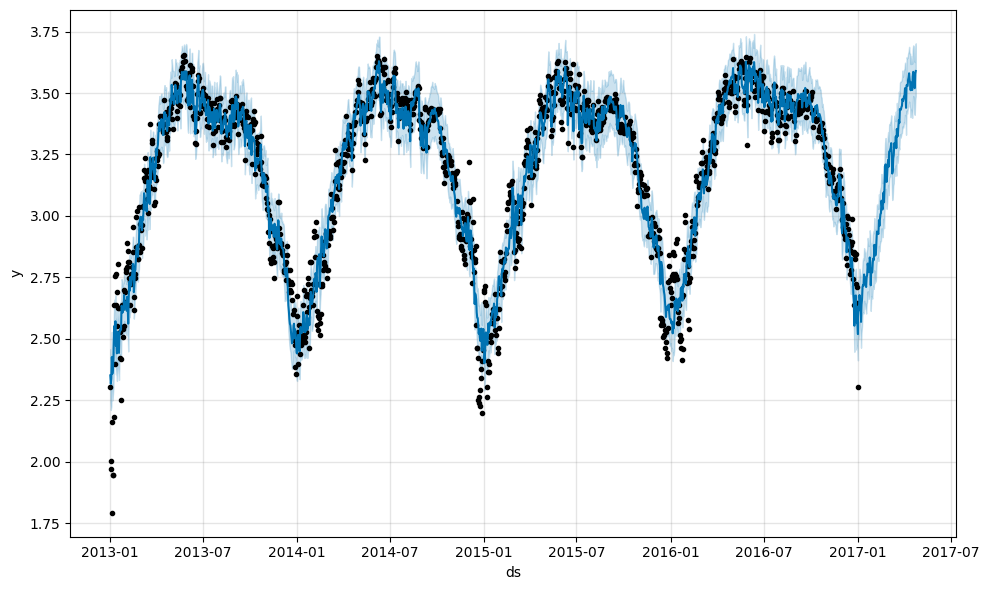

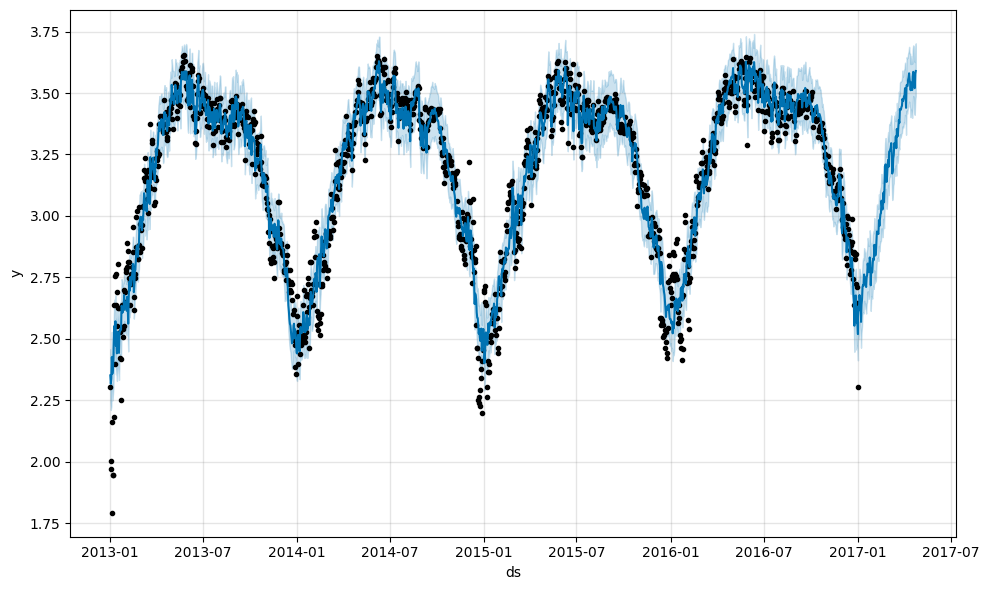

In [ ]:
model_new.plot(forecast_data)

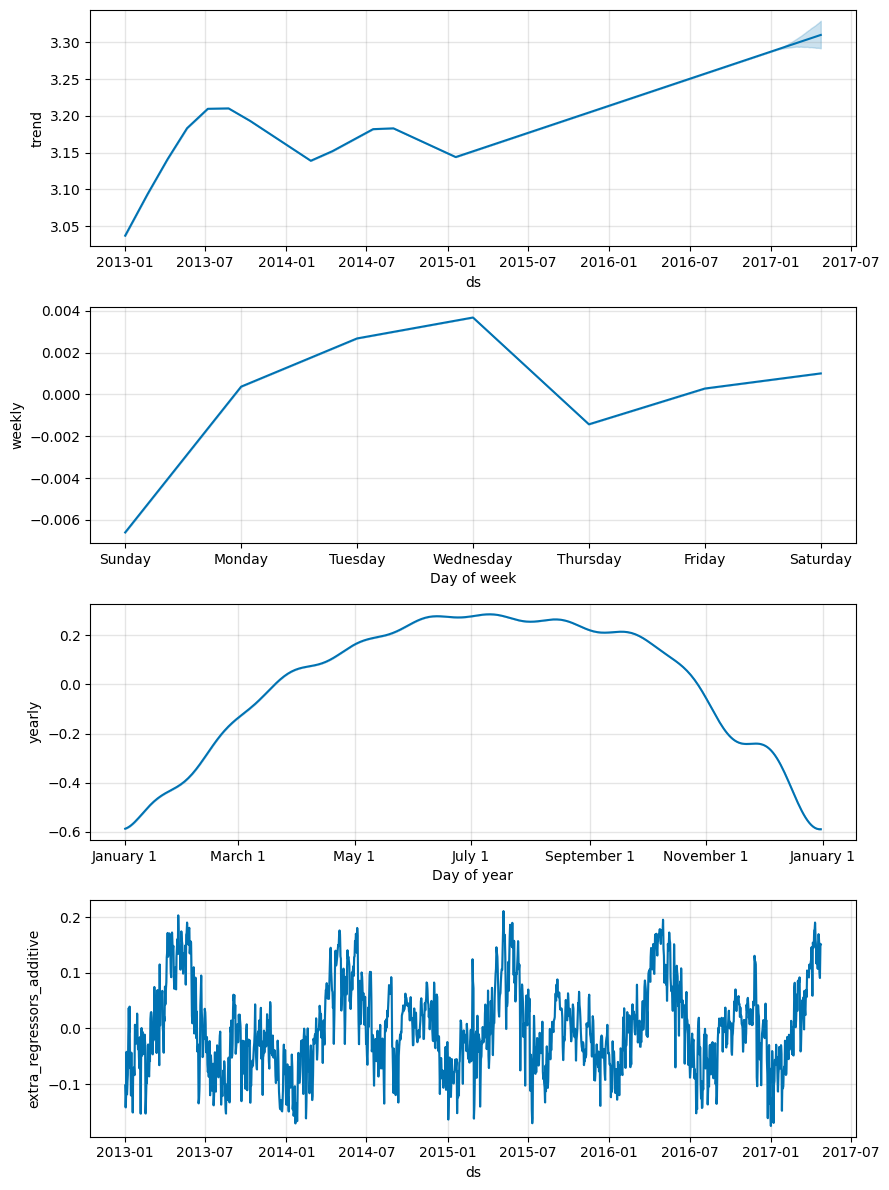

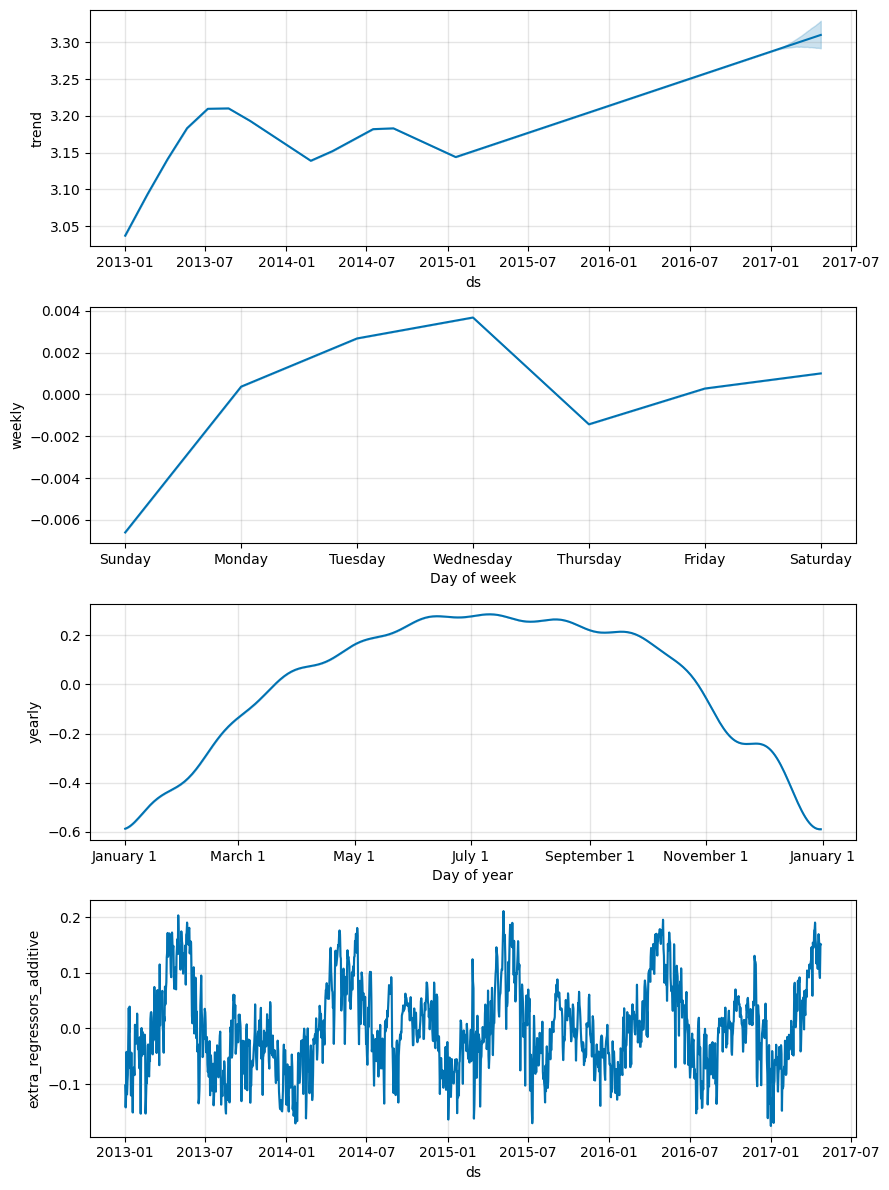

In [ ]:
model_new.plot_components(forecast_data)


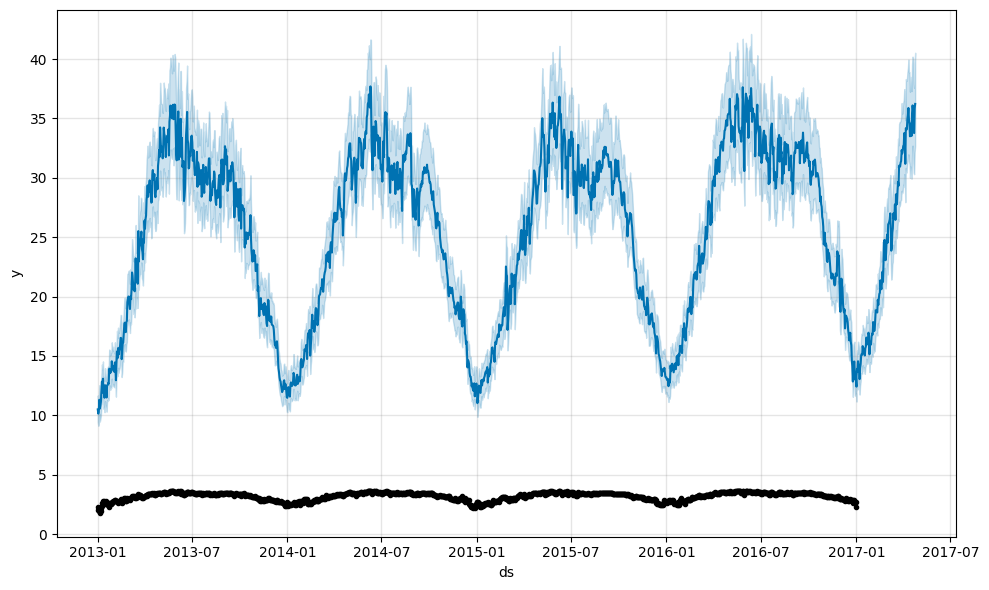

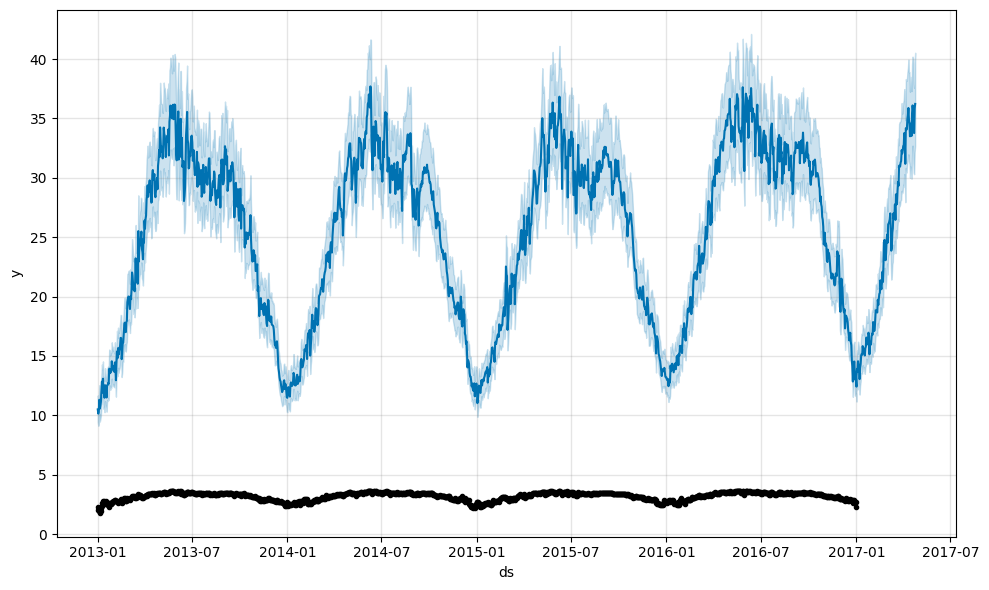

In [ ]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model_new.plot(forecast_data_orig)

In [ ]:

df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']


In [ ]:

final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'